In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据

导入之前，先查看数据格式，确定首行是什么？分隔符是什么？

In [4]:
df = pd.read_csv('./order_info_2016.csv', index_col='id') 
df.head()

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
1,232148841,2794924,268,110001,35300,35300,9058255c90,3,2016-01-01 12:53:02,2016-01-01 12:53:24
2,222298971,1664684,801,330001,51200,49900,e0e6019897,2,2016-01-01 21:42:51,2016-01-01 21:43:30
3,211494392,2669372,934,220002,62100,62100,9058255c90,3,2016-01-01 14:10:13,2016-01-01 14:11:18
4,334575272,1924727,422,230001,50600,42000,46d5cea30d,2,2016-01-01 17:43:35,2016-01-01 17:43:53
5,144825651,4148671,473,130006,149100,142000,6ff1752b69,2,2016-01-01 18:52:04,2016-01-01 18:52:47


分别使用 describe 和 info 方法观察数据的分布情况：

In [5]:
df.describe()

,orderId,userId,productId,cityId,price,payMoney,deviceType
count,1.045570e+05,1.045570e+05,104557.000000,104557.000000,1.045570e+05,1.045570e+05,104557.000000
mean,2.993341e+08,3.270527e+06,504.566275,154410.947225,9.167350e+04,8.686689e+04,2.385292
std,5.149818e+07,4.138208e+07,288.130647,72197.163762,9.158836e+04,9.072028e+04,0.648472
min,1.035627e+08,2.930600e+04,0.000000,30000.000000,6.000000e+02,-1.000000e+03,1.000000
25%,2.633627e+08,2.179538e+06,254.000000,100011.000000,3.790000e+04,3.360000e+04,2.000000
50%,2.989828e+08,2.705995e+06,507.000000,150001.000000,5.920000e+04,5.500000e+04,2.000000
75%,3.349972e+08,3.271237e+06,758.000000,220002.000000,1.080000e+05,1.040000e+05,3.000000
max,4.871430e+08,3.072939e+09,1000.000000,380001.000000,2.295600e+06,2.294200e+06,6.000000


观察发现，有两个数据存在问题：productID 最小值为 0，payMoney 最小值为负数。

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   orderId     104557 non-null  int64 
 1   userId      104557 non-null  int64 
 2   productId   104557 non-null  int64 
 3   cityId      104557 non-null  int64 
 4   price       104557 non-null  int64 
 5   payMoney    104557 non-null  int64 
 6   channelId   104549 non-null  object
 7   deviceType  104557 non-null  int64 
 8   createTime  104557 non-null  object
 9   payTime     104557 non-null  object
dtypes: int64(7), object(3)
memory usage: 8.8+ MB


可以看出，总共有 104557 条数据，其中 channelID 缺少 8 条数据。

# 清洗数据

依据字段的特性，逐个进行判断和清洗。

## orderID

由于 orderID 在系统里是唯一值。

查看是否有重复的 orderID。如果有，通常最后再来处理重复值，先继续清洗其他字段，因为其他字段可能会影响到重复值。

In [9]:
df.orderId.unique().size

104530

In [10]:
df.orderId.size

104557

可见，orderID 存在 27 条重复值。

## userID

userID 可以重复，没有其他特殊要求。从 df.info() 结果来看，userID 是完整的，无需再进行清洗。

## productID

productId 最小值是0，先来看下值为 0 的记录数量。共 177 条，可能是由于商品上架下架引起的。待处理完其他字段后，将其删除。

In [12]:
df.productId[(df.productId == 0)].size

177

## cityID

cityID 和 userID  类似，值都在正常范围内，无需再处理。

## price

price 没有空值，且都大于0。但是单位是分，按习惯需要把它变成元。

In [13]:
df.price = df.price / 100

## payMoney

payMoney 有负值，我们下单不可能是负值，所以这里将负值的记录删除。总共 6 条记录，删除不影响。并将 payMoney 的单位转换成元。

In [14]:
df[df.payMoney < 0]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
25344,288096069,2145955,511,230014,111.0,-1000,df9f79c426,2,2016-03-11 21:32:54,2016-03-11 21:33:10
55044,296608442,4073997,385,120006,111.0,-1000,cbccc0808e,2,2016-05-24 08:52:04,2016-05-24 08:52:23
66897,316685479,1949907,554,60019,2084.0,-1000,9058255c90,3,2016-03-31 11:57:46,2016-03-31 11:57:46
72556,323229098,2894042,548,220008,114.0,-1000,41a4e91d29,2,2016-08-09 14:24:13,2016-08-09 14:24:26
81494,311194385,3370399,797,40001,116.0,-990,ea5648bbe2,1,2016-09-06 11:20:43,2016-09-06 11:21:31
87878,324068352,1873953,602,260003,292.0,-1000,9058255c90,3,2016-10-05 10:47:05,2016-10-05 10:47:05


In [15]:
df.drop(index=df[df.payMoney < 0].index, inplace=True)

In [16]:
df[df.payMoney < 0].index

Int64Index([], dtype='int64', name='id')

In [17]:
df.payMoney = df.payMoney / 100

## channelId

channelId 根据info 的结果，缺少 8 条数据，可能是未录入完整的原因。数据量小，不会对分析造成什么影响，故直接删除即可。

In [20]:
df[df.channelId.isnull()]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
19086,284008366,3309847,698,240001,2164.0,2040.0,NaN,2,2016-03-08 22:36:12,2016-03-08 22:36:50
38175,287706890,2799815,823,70001,760.0,749.0,NaN,3,2016-06-10 22:30:18,2016-06-10 22:30:47
48073,248057459,3970570,142,130001,474.0,400.0,NaN,2,2016-03-30 12:59:03,2016-03-30 12:59:13
75949,266847859,3761925,649,120006,257.0,257.0,NaN,2,2016-08-19 08:46:22,2016-08-19 08:46:39
100952,283627429,4156620,269,280001,484.0,410.0,NaN,2,2016-12-13 13:24:37,2016-12-13 14:47:08
100953,346836140,3751526,738,100013,105.0,80.0,NaN,1,2016-12-13 13:47:34,2016-12-13 13:47:44
100954,352853915,2229389,786,240001,474.0,440.0,NaN,2,2016-12-13 16:54:09,2016-12-13 16:55:00
100955,379473081,4531810,18,180009,146.0,50.0,NaN,3,2016-12-13 20:18:22,2016-12-13 20:18:34


In [21]:
df.drop(index=df[df.channelId.isnull()].index, inplace=True)

In [22]:
df[df.channelId.isnull()]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


## createTime 和 payTime

两者都没有 null，但此处需要统计2016年的数据，所以把 createTime 非2016年的数据删掉。

先把createTime和payTime转换成datetime格式。

In [25]:
df.createTime = pd.to_datetime(df.createTime)
df.payTime = pd.to_datetime(df.payTime)
df.dtypes

orderId                int64
userId                 int64
productId              int64
cityId                 int64
price                float64
payMoney             float64
channelId             object
deviceType             int64
createTime    datetime64[ns]
payTime       datetime64[ns]
dtype: object

In [26]:
import datetime
startTime = datetime.datetime(2016, 1, 1)
endTime = datetime.datetime(2016, 12, 31, 23, 59, 59)

In [28]:
df[df.createTime < startTime]
df.drop(index=df[df.createTime < startTime].index, inplace=True) 
df.drop(index=df[df.createTime > df.payTime].index, inplace=True)
df[df.createTime < startTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [30]:
df[df.createTime > endTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [31]:
df[df.payTime < startTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


## 综合处理

1. 把 orderId 重复的记录删掉
2. 把 productId 为0的记录删掉

In [33]:
df.drop(index=df[df.orderId.duplicated()].index, inplace=True) 
df.orderId.unique().size

104506

In [34]:
df.drop(index=df[df.productId==0].index, inplace=True)

# 分析数据

## 查看数据总体情况

In [35]:
#总订单数，总下单用户，总销售额，有流水的商品数

print(df.orderId.count()) 
print(df.userId.unique().size) 
print(df.payMoney.sum()/100)
print(df.productId.unique().size)

104329
102447
906663.997
1000


## 商品销量和销售额分析

In [36]:
#销量前十和后十的商品品类
productId_orderCount = df.groupby('productId').count() ['orderId'].sort_values(ascending=False)
print(productId_orderCount.head(10))
print(productId_orderCount.tail(10))

productId
895    354
762    350
103    334
587    303
385    302
60     301
38     301
403    297
345    292
823    288
Name: orderId, dtype: int64
productId
948     29
856     28
621     27
272     26
563     24
347     21
597     19
468     18
986     16
1000    13
Name: orderId, dtype: int64


In [43]:
#销售额前十和后十的商品品类
productId_totalPay = df.groupby('productId').sum() ['payMoney'].sort_values(ascending=False)
print(productId_totalPay.head(10))
print(productId_totalPay.tail(10))

productId
385    427522.1
61     361572.0
103    344641.2
405    339525.0
720    322405.1
345    320162.2
698    318458.6
182    296600.0
383    280790.0
396    269556.0
Name: payMoney, dtype: float64
productId
310     22879.0
847     22869.0
454     22535.0
817     22509.0
597     21847.0
408     18111.0
986     14784.0
964     14238.0
1000    12169.0
347     12070.0
Name: payMoney, dtype: float64


In [45]:
#查看销量和销售额最后100个商品的交集 
problem_productIds = productId_totalPay.tail(100).index.intersection(productId_orderCount.tail(100).index)
print(problem_productIds)

Int64Index([  14,  807,  599,  676,    7,  469,  577,  551,  318,  220,  528,
             303,  314,  359,  629,  582,  985,  218,  578,  227,  277,  145,
             855,  586,  958,   91,  856,  948,  859,  874,  806,  272,  392,
              27,  460,  436,  468,  579,  868,  137,   16,  590,  247,  569,
             242,  104,  621,  478,  310,  847,  454,  817,  597,  408,  986,
             964, 1000,  347],
           dtype='int64', name='productId')


分析显示，上述销量和销售额都不佳的商品，和业务商讨，判断是不是要优化或者下架。

## 渠道分析

In [87]:
#销量前十的渠道
productId_channel_orderCount = df.groupby('channelId').count() ['orderId'].sort_values(ascending=False)
print(productId_channel_orderCount.head(10))

channelId
9058255c90    38822
29d55d09c6     7411
41a4e91d29     6737
df9f79c426     5929
46d5cea30d     4943
e0e6019897     3686
e7dc8ef259     3530
ad7e4ca9ae     2887
4c33002d9a     2818
e22babe5d4     2415
Name: orderId, dtype: int64


In [88]:
#各个渠道、各商品的销量
productId_channel_orderCount = df.groupby(['channelId','productId']).count() ['orderId'].sort_values(ascending=False)
print(productId_channel_orderCount)

channelId   productId
9058255c90  762          132
            385          125
            895          123
            103          120
            613          115
                        ... 
a7b5e022c8  72             1
            78             1
            89             1
            134            1
0049dbeeeb  186            1
Name: orderId, Length: 28468, dtype: int64


In [89]:
#各个渠道、各商品的销售额
productId_channel_totalPay = df.groupby(['channelId','productId']).sum() ['payMoney'].sort_values(ascending=False)
print(productId_channel_totalPay)

channelId   productId
9058255c90  385          188085.1
            405          163446.0
            345          150250.2
            61           139829.0
            720          130654.0
                           ...   
8664ebb1ed  507               0.0
e0e6019897  537               0.0
5fb938db89  385               0.0
a33b212a84  248               0.0
            338               0.0
Name: payMoney, Length: 28468, dtype: float64


获取销量前十的渠道成本，进一步分析渠道整体效益，并分析各渠道商品销量的差异。

## 下单时间分析

按小时、按周，查看下单时间分布情况。

<AxesSubplot:xlabel='orderHour'>

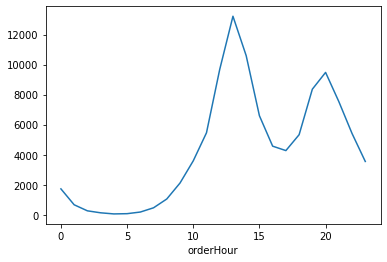

In [91]:
df['orderHour'] = df.createTime.dt.hour
df.groupby('orderHour').count()['orderId'].plot()

In [92]:
df['orderWeek'] = df.createTime.dt.dayofweek
df.groupby('orderWeek').count()['orderId']

orderWeek
0    12503
1    12484
2    12932
3    13794
4    16198
5    19496
6    16922
Name: orderId, dtype: int64

由此可见：
1. 每天存在两个高峰期，中午12-14点、晚上20点左右。
2. 每周，周六成交量最多，其次是周五和周日。

在此阶段适当多投放一些推广。